In [1]:
import pandas as pd
import json
import requests
import time
from tqdm import tqdm
import os

save_path = "/content/drive/MyDrive/EECS6444/Project/RQ2"

# get resolution status

In [2]:
df = pd.read_csv(os.path.join(save_path, "final_clustered_dataset.csv"))
df = df.drop(columns=["patch", "test_patch",
                      "num_PASS_TO_PASS",	"has_hint",	"hint_length",
                      "clean_text", "umap_2d_x",	"umap_2d_y",	"cluster_label_all"])
df.head()

,repo,instance_id,version,n_files_touched,patch_size,n_test_files_touched,test_patch_size,num_FAIL_TO_PASS,problem_length_words,predicted_GH_labels,dominant_topic,hdbscan_topic,hdbscan_topic_all
0,astropy/astropy,astropy__astropy-12907,4.3,1,2,1,19,2,158,bug,8,0,0
1,astropy/astropy,astropy__astropy-14182,5.1,1,41,1,28,1,189,enhancement,6,-1,3
2,astropy/astropy,astropy__astropy-14365,5.1,1,4,1,15,1,202,bug,12,-1,2
3,astropy/astropy,astropy__astropy-14995,5.2,1,4,1,39,1,357,bug,6,3,2
4,astropy/astropy,astropy__astropy-6938,1.3,1,2,2,17,2,76,bug,4,-1,4


In [3]:
models = {"ExpeRepair_Claude4":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250625_ExpeRepair-v1_claude-4-sonnet-20250514/results/results.json",
          "Refact_ai_Agent":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250425_Refact_Agent/results/results.json",
          "KGCompass_Claude4":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250906_KGCompass_claude-4-sonnet-20250514/results/results.json",
          "SWE-agent_Claude4":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250526_sweagent_claude-4-sonnet-20250514/results/results.json",
          "SWE-agent_Claude3_7":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250226_sweagent_claude-3-7-sonnet-20250219/results/results.json",
          "KGCompass_DeepSeek_V3":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250609_KGCompass_deepseek-v3/results/results.json",
          "Moatless_Tools_Deepseek_V3":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250111_moatless_deepseek_v3/results/results.json",
          "SWE-Fixer_Qwen25-7b":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250306_SWE-Fixer_Qwen2.5-7b-retriever_Qwen2.5-72b-editor/results/results.json",
          "SWE-agent_GPT_4o":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20240728_sweagent_gpt4o/results/results.json",
          "SWE-agent_Claude3Opus":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20240402_sweagent_claude3opus/results/results.json"}


In [4]:
# Iterate over models with progress bar
for model, url in tqdm(models.items(), desc="Processing models"):
    try:
        response = requests.get(url)
        resolved_issues = response.json()["resolved"]  # adjust key if necessary
    except Exception as e:
        print(f"Error loading {model}: {e}")
        continue

    df[model] = df['instance_id'].apply(lambda x: 1 if x in resolved_issues else 0)
    # Sleep to avoid hitting rate limits
    time.sleep(5)

Processing models: 100%|██████████| 10/10 [00:50<00:00,  5.05s/it]


In [5]:
print("\n=== Resolution Percentages ===")
for model in models.keys():
    col_name = model
    if col_name in df.columns:
        resolution_rate = df[col_name].mean() * 100
        print(f"{model}: {resolution_rate:.2f}%")



=== Resolution Percentages ===
ExpeRepair_Claude4: 60.33%
Refact_ai_Agent: 60.00%
KGCompass_Claude4: 58.33%
SWE-agent_Claude4: 56.67%
SWE-agent_Claude3_7: 48.00%
KGCompass_DeepSeek_V3: 36.67%
Moatless_Tools_Deepseek_V3: 30.67%
SWE-Fixer_Qwen25-7b: 24.67%
SWE-agent_GPT_4o: 18.33%
SWE-agent_Claude3Opus: 11.67%


In [6]:
df.head()

,repo,instance_id,version,n_files_touched,patch_size,n_test_files_touched,test_patch_size,num_FAIL_TO_PASS,problem_length_words,predicted_GH_labels,...,ExpeRepair_Claude4,Refact_ai_Agent,KGCompass_Claude4,SWE-agent_Claude4,SWE-agent_Claude3_7,KGCompass_DeepSeek_V3,Moatless_Tools_Deepseek_V3,SWE-Fixer_Qwen25-7b,SWE-agent_GPT_4o,SWE-agent_Claude3Opus
0,astropy/astropy,astropy__astropy-12907,4.3,1,2,1,19,2,158,bug,...,1,1,1,1,1,1,0,0,0,1
1,astropy/astropy,astropy__astropy-14182,5.1,1,41,1,28,1,189,enhancement,...,0,0,0,0,0,0,0,0,0,0
2,astropy/astropy,astropy__astropy-14365,5.1,1,4,1,15,1,202,bug,...,0,0,0,0,0,0,0,0,0,0
3,astropy/astropy,astropy__astropy-14995,5.2,1,4,1,39,1,357,bug,...,1,1,1,1,1,1,1,1,1,1
4,astropy/astropy,astropy__astropy-6938,1.3,1,2,2,17,2,76,bug,...,1,1,1,1,0,1,0,1,0,0


In [7]:
df.to_csv(os.path.join(save_path, "SWE_bench_lite_with_resolution.csv"), index=False)

# Analysis

In [2]:
df = pd.read_csv(os.path.join(save_path, "SWE_bench_lite_with_resolution.csv"))
df.head()

,repo,instance_id,version,n_files_touched,patch_size,n_test_files_touched,test_patch_size,num_FAIL_TO_PASS,problem_length_words,predicted_GH_labels,...,ExpeRepair_Claude4,Refact_ai_Agent,KGCompass_Claude4,SWE-agent_Claude4,SWE-agent_Claude3_7,KGCompass_DeepSeek_V3,Moatless_Tools_Deepseek_V3,SWE-Fixer_Qwen25-7b,SWE-agent_GPT_4o,SWE-agent_Claude3Opus
0,astropy/astropy,astropy__astropy-12907,4.3,1,2,1,19,2,158,bug,...,1,1,1,1,1,1,0,0,0,1
1,astropy/astropy,astropy__astropy-14182,5.1,1,41,1,28,1,189,enhancement,...,0,0,0,0,0,0,0,0,0,0
2,astropy/astropy,astropy__astropy-14365,5.1,1,4,1,15,1,202,bug,...,0,0,0,0,0,0,0,0,0,0
3,astropy/astropy,astropy__astropy-14995,5.2,1,4,1,39,1,357,bug,...,1,1,1,1,1,1,1,1,1,1
4,astropy/astropy,astropy__astropy-6938,1.3,1,2,2,17,2,76,bug,...,1,1,1,1,0,1,0,1,0,0


## predicted_GH_labels

In [3]:
import pandas as pd

# Example with predicted GitHub labels
cluster_col = 'predicted_GH_labels'
agent_cols = [
    'ExpeRepair_Claude4', 'Refact_ai_Agent', 'KGCompass_Claude4', 'SWE-agent_Claude4',
    'SWE-agent_Claude3_7', 'KGCompass_DeepSeek_V3', 'Moatless_Tools_Deepseek_V3',
    'SWE-Fixer_Qwen25-7b', 'SWE-agent_GPT_4o', 'SWE-agent_Claude3Opus'
]

cluster_perf = df.groupby(cluster_col)[agent_cols].mean()
cluster_perf


,ExpeRepair_Claude4,Refact_ai_Agent,KGCompass_Claude4,SWE-agent_Claude4,SWE-agent_Claude3_7,KGCompass_DeepSeek_V3,Moatless_Tools_Deepseek_V3,SWE-Fixer_Qwen25-7b,SWE-agent_GPT_4o,SWE-agent_Claude3Opus
predicted_GH_labels,,,,,,,,,,
bug,0.619469,0.606195,0.597345,0.584071,0.469027,0.353982,0.314159,0.234513,0.194690,0.097345
enhancement,0.516667,0.533333,0.500000,0.450000,0.466667,0.366667,0.300000,0.316667,0.166667,0.200000
question,0.714286,0.785714,0.714286,0.785714,0.714286,0.571429,0.214286,0.142857,0.071429,0.071429


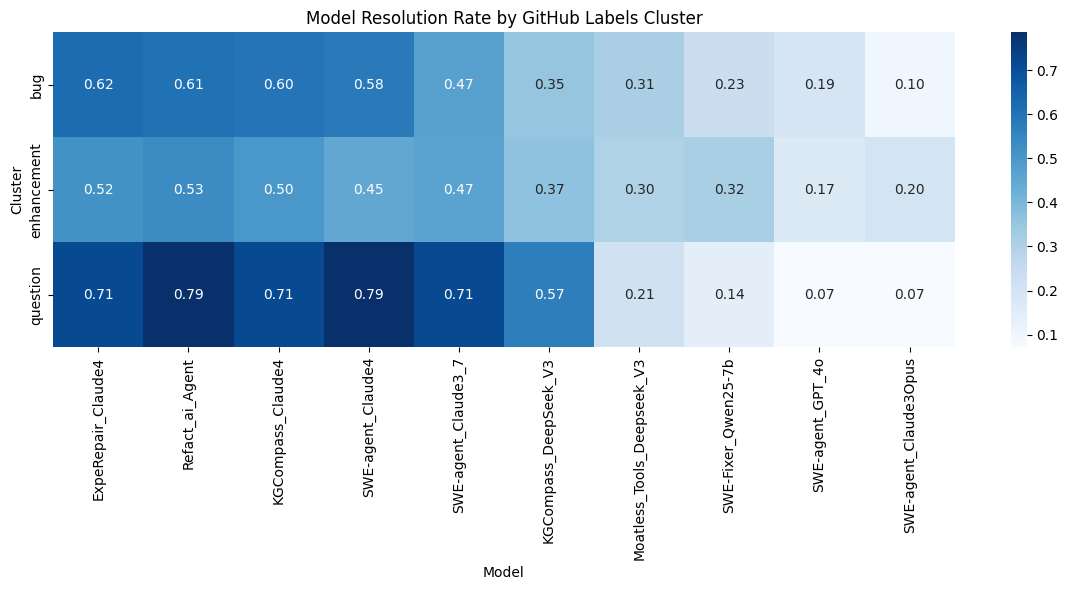

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(cluster_perf, annot=True, fmt=".2f", cmap="Blues")
plt.title("Model Resolution Rate by GitHub Labels Cluster")
plt.xlabel("Model")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig(os.path.join(save_path, "GitHub_labels_resolution_heatmap.pdf"))
plt.show()


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import statsmodels.formula.api as smf


# Helper: Cramér's V
def cramers_v(ct):
    chi2 = chi2_contingency(ct)[0]
    n = ct.sum().sum()
    k = min(ct.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

CLUSTER_COL = "predicted_GH_labels"

AGENT_COLS = [
    "ExpeRepair_Claude4",
    "Refact_ai_Agent",
    "KGCompass_Claude4",
    "SWE-agent_Claude4",
    "SWE-agent_Claude3_7",
    "KGCompass_DeepSeek_V3",
    "Moatless_Tools_Deepseek_V3",
    "SWE-Fixer_Qwen25-7b",
    "SWE-agent_GPT_4o",
    "SWE-agent_Claude3Opus"
]

print("=" * 80)
print(f"Analyzing relationship between cluster '{CLUSTER_COL}' and agent performance")
print("Success is binary (0 = fail, 1 = success)")
print("=" * 80)

# Per-agent chi-square analysis
print("\n[1] Per-agent chi-square tests of independence")
print(
    "For each agent, we test whether success is independent of cluster assignment.\n"
    "A low p-value indicates that the agent's success rate varies across clusters."
)

results = []

for agent in AGENT_COLS:
    ct = pd.crosstab(df[CLUSTER_COL], df[agent])
    chi2, p, dof, _ = chi2_contingency(ct)
    cv = cramers_v(ct)

    results.append({
        "agent": agent,
        "chi2_p_value": p,
        "cramers_v": cv
    })

results_df = pd.DataFrame(results)

# Multiple testing correction

print("\n[2] Multiple testing correction (Benjamini–Hochberg FDR)")
print(
    "Because we test multiple agents, we control the false discovery rate.\n"
    "Use the FDR-corrected p-values to assess statistical significance."
)

results_df["chi2_p_fdr"] = multipletests(
    results_df["chi2_p_value"],
    method="fdr_bh"
)[1]

results_df = results_df.sort_values("chi2_p_fdr")

print("\nInterpretation guide:")
print(" - chi2_p_fdr < 0.05 : statistically significant association")
print(" - Cramér’s V ≈ 0.1  : small effect")
print(" - Cramér’s V ≈ 0.3  : moderate effect")
print(" - Cramér’s V ≥ 0.5  : strong effect")

print("\nChi-square results:")
print(results_df)


Analyzing relationship between cluster 'predicted_GH_labels' and agent performance
Success is binary (0 = fail, 1 = success)

[1] Per-agent chi-square tests of independence
For each agent, we test whether success is independent of cluster assignment.
A low p-value indicates that the agent's success rate varies across clusters.

[2] Multiple testing correction (Benjamini–Hochberg FDR)
Because we test multiple agents, we control the false discovery rate.
Use the FDR-corrected p-values to assess statistical significance.

Interpretation guide:
 - chi2_p_fdr < 0.05 : statistically significant association
 - Cramér’s V ≈ 0.1  : small effect
 - Cramér’s V ≈ 0.3  : moderate effect
 - Cramér’s V ≥ 0.5  : strong effect

Chi-square results:
                        agent  chi2_p_value  cramers_v  chi2_p_fdr
0          ExpeRepair_Claude4      0.240616   0.097453    0.345174
1             Refact_ai_Agent      0.206062   0.102618    0.345174
2           KGCompass_Claude4      0.236384   0.098058    

In [6]:

# Logistic regression (global analysis)
print("\n" + "=" * 80)
print("[3] Global logistic regression with cluster × agent interaction")
print(
    "This model tests whether the effect of cluster membership on success\n"
    "differs across agents (i.e., agent-specific sensitivity to issue type)."
)
print("=" * 80)

# Convert to long format
df_long = df.melt(
    id_vars=[CLUSTER_COL],
    value_vars=AGENT_COLS,
    var_name="agent",
    value_name="success"
)

df_long[CLUSTER_COL] = df_long[CLUSTER_COL].astype(str)
df_long["agent"] = df_long["agent"].astype(str)

formula = f"success ~ C({CLUSTER_COL}) * C(agent)"
logit_model = smf.logit(formula, data=df_long).fit()

print("\nLogistic regression summary:")
print(logit_model.summary())

print("\nInterpretation guide:")
print(
    " - Significant cluster coefficients indicate clusters that are globally\n"
    "   easier or harder across agents.\n"
    " - Significant interaction terms indicate that specific agents respond\n"
    "   differently to certain clusters.\n"
    " - If interactions are insignificant, cluster effects are largely uniform."
)

print("\nAnalysis complete.")



[3] Global logistic regression with cluster × agent interaction
This model tests whether the effect of cluster membership on success
differs across agents (i.e., agent-specific sensitivity to issue type).
Optimization terminated successfully.
         Current function value: 0.601742
         Iterations 7

Logistic regression summary:
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2970
Method:                           MLE   Df Model:                           29
Date:                Sun, 28 Dec 2025   Pseudo R-squ.:                  0.1087
Time:                        06:33:17   Log-Likelihood:                -1805.2
converged:                       True   LL-Null:                       -2025.3
Covariance Type:            nonrobust   LLR p-value:                 4.942e-75
                              

## dominant_topic

In [7]:
import pandas as pd

# Example with predicted GitHub labels
cluster_col = 'dominant_topic'
agent_cols = [
    'ExpeRepair_Claude4', 'Refact_ai_Agent', 'KGCompass_Claude4', 'SWE-agent_Claude4',
    'SWE-agent_Claude3_7', 'KGCompass_DeepSeek_V3', 'Moatless_Tools_Deepseek_V3',
    'SWE-Fixer_Qwen25-7b', 'SWE-agent_GPT_4o', 'SWE-agent_Claude3Opus'
]

cluster_perf = df.groupby(cluster_col)[agent_cols].mean()
cluster_perf


,ExpeRepair_Claude4,Refact_ai_Agent,KGCompass_Claude4,SWE-agent_Claude4,SWE-agent_Claude3_7,KGCompass_DeepSeek_V3,Moatless_Tools_Deepseek_V3,SWE-Fixer_Qwen25-7b,SWE-agent_GPT_4o,SWE-agent_Claude3Opus
dominant_topic,,,,,,,,,,
0,0.645161,0.677419,0.645161,0.709677,0.548387,0.354839,0.225806,0.161290,0.193548,0.129032
1,0.550000,0.350000,0.400000,0.450000,0.300000,0.300000,0.200000,0.150000,0.250000,0.050000
2,0.750000,0.875000,0.875000,0.875000,0.625000,0.625000,0.500000,0.625000,0.250000,0.250000
3,0.454545,0.272727,0.090909,0.545455,0.363636,0.090909,0.181818,0.272727,0.000000,0.000000
4,0.619048,0.666667,0.666667,0.619048,0.476190,0.380952,0.380952,0.476190,0.285714,0.095238
5,0.333333,0.416667,0.333333,0.416667,0.416667,0.250000,0.166667,0.166667,0.083333,0.000000
6,0.637500,0.650000,0.637500,0.575000,0.525000,0.437500,0.375000,0.287500,0.187500,0.125000
7,0.583333,0.500000,0.541667,0.541667,0.458333,0.375000,0.250000,0.250000,0.166667,0.125000
8,0.600000,0.733333,0.666667,0.466667,0.400000,0.333333,0.333333,0.066667,0.133333,0.200000


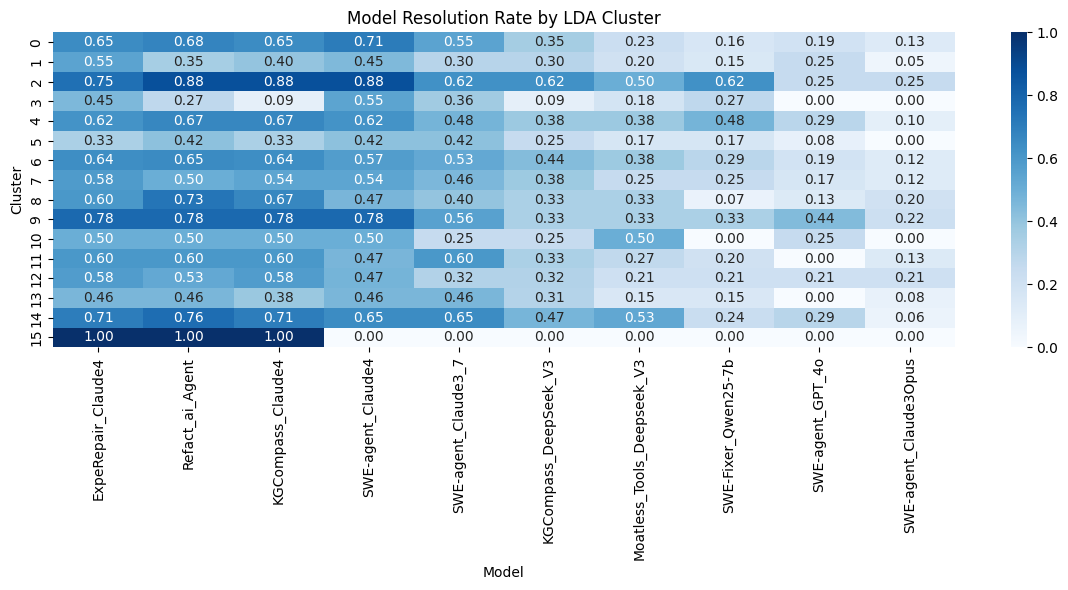

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(cluster_perf, annot=True, fmt=".2f", cmap="Blues")
plt.title("Model Resolution Rate by LDA Cluster")
plt.xlabel("Model")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig(os.path.join(save_path, "LDA_resolution_heatmap.pdf"))
plt.show()


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import statsmodels.formula.api as smf

def cramers_v(ct):
    chi2 = chi2_contingency(ct)[0]
    n = ct.sum().sum()
    k = min(ct.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

CLUSTER_COL = "dominant_topic"

AGENT_COLS = [
    "ExpeRepair_Claude4",
    "Refact_ai_Agent",
    "KGCompass_Claude4",
    "SWE-agent_Claude4",
    "SWE-agent_Claude3_7",
    "KGCompass_DeepSeek_V3",
    "Moatless_Tools_Deepseek_V3",
    "SWE-Fixer_Qwen25-7b",
    "SWE-agent_GPT_4o",
    "SWE-agent_Claude3Opus"
]

print("=" * 80)
print(f"Analyzing relationship between cluster '{CLUSTER_COL}' and agent performance")
print("Success is binary (0 = fail, 1 = success)")
print("=" * 80)


# Per-agent chi-square analysis

print("\n[1] Per-agent chi-square tests of independence")
print(
    "For each agent, we test whether success is independent of cluster assignment.\n"
    "A low p-value indicates that the agent's success rate varies across clusters."
)

results = []

for agent in AGENT_COLS:
    ct = pd.crosstab(df[CLUSTER_COL], df[agent])
    chi2, p, dof, _ = chi2_contingency(ct)
    cv = cramers_v(ct)

    results.append({
        "agent": agent,
        "chi2_p_value": p,
        "cramers_v": cv
    })

results_df = pd.DataFrame(results)


# Multiple testing correction
print("\n[2] Multiple testing correction (Benjamini–Hochberg FDR)")
print(
    "Because we test multiple agents, we control the false discovery rate.\n"
    "Use the FDR-corrected p-values to assess statistical significance."
)

results_df["chi2_p_fdr"] = multipletests(
    results_df["chi2_p_value"],
    method="fdr_bh"
)[1]

results_df = results_df.sort_values("chi2_p_fdr")

print("\nInterpretation guide:")
print(" - chi2_p_fdr < 0.05 : statistically significant association")
print(" - Cramér’s V ≈ 0.1  : small effect")
print(" - Cramér’s V ≈ 0.3  : moderate effect")
print(" - Cramér’s V ≥ 0.5  : strong effect")

print("\nChi-square results:")
print(results_df)


Analyzing relationship between cluster 'dominant_topic' and agent performance
Success is binary (0 = fail, 1 = success)

[1] Per-agent chi-square tests of independence
For each agent, we test whether success is independent of cluster assignment.
A low p-value indicates that the agent's success rate varies across clusters.

[2] Multiple testing correction (Benjamini–Hochberg FDR)
Because we test multiple agents, we control the false discovery rate.
Use the FDR-corrected p-values to assess statistical significance.

Interpretation guide:
 - chi2_p_fdr < 0.05 : statistically significant association
 - Cramér’s V ≈ 0.1  : small effect
 - Cramér’s V ≈ 0.3  : moderate effect
 - Cramér’s V ≥ 0.5  : strong effect

Chi-square results:
                        agent  chi2_p_value  cramers_v  chi2_p_fdr
2           KGCompass_Claude4      0.023603   0.303801    0.236026
1             Refact_ai_Agent      0.067954   0.281867    0.339770
7         SWE-Fixer_Qwen25-7b      0.135219   0.264894    0.450

In [11]:

# Logistic regression (global analysis)
print("\n" + "=" * 80)
print("[3] Global logistic regression with cluster × agent interaction")
print(
    "This model tests whether the effect of cluster membership on success\n"
    "differs across agents (i.e., agent-specific sensitivity to issue type)."
)
print("=" * 80)

# Convert to long format
df_long = df.melt(
    id_vars=[CLUSTER_COL],
    value_vars=AGENT_COLS,
    var_name="agent",
    value_name="success"
)

df_long[CLUSTER_COL] = df_long[CLUSTER_COL].astype(str)
df_long["agent"] = df_long["agent"].astype(str)

# formula = f"success ~ C({CLUSTER_COL}) * C(agent)"
formula = f"success ~ C({CLUSTER_COL}) + C(agent)"
logit_model = smf.logit(formula, data=df_long).fit()

print("\nLogistic regression summary:")
print(logit_model.summary())

print("\nInterpretation guide:")
print(
    " - Significant cluster coefficients indicate clusters that are globally\n"
    "   easier or harder across agents.\n"
    " - Significant interaction terms indicate that specific agents respond\n"
    "   differently to certain clusters.\n"
    " - If interactions are insignificant, cluster effects are largely uniform."
)

print("\nAnalysis complete.")



[3] Global logistic regression with cluster × agent interaction
This model tests whether the effect of cluster membership on success
differs across agents (i.e., agent-specific sensitivity to issue type).
Optimization terminated successfully.
         Current function value: 0.590597
         Iterations 6

Logistic regression summary:
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2975
Method:                           MLE   Df Model:                           24
Date:                Sun, 28 Dec 2025   Pseudo R-squ.:                  0.1252
Time:                        06:47:05   Log-Likelihood:                -1771.8
converged:                       True   LL-Null:                       -2025.3
Covariance Type:            nonrobust   LLR p-value:                 5.568e-92
                              

## hdbscan_topic

In [12]:
import pandas as pd

# Example with predicted GitHub labels
cluster_col = 'hdbscan_topic'
agent_cols = [
    'ExpeRepair_Claude4', 'Refact_ai_Agent', 'KGCompass_Claude4', 'SWE-agent_Claude4',
    'SWE-agent_Claude3_7', 'KGCompass_DeepSeek_V3', 'Moatless_Tools_Deepseek_V3',
    'SWE-Fixer_Qwen25-7b', 'SWE-agent_GPT_4o', 'SWE-agent_Claude3Opus'
]

cluster_perf = df.groupby(cluster_col)[agent_cols].mean()
cluster_perf


,ExpeRepair_Claude4,Refact_ai_Agent,KGCompass_Claude4,SWE-agent_Claude4,SWE-agent_Claude3_7,KGCompass_DeepSeek_V3,Moatless_Tools_Deepseek_V3,SWE-Fixer_Qwen25-7b,SWE-agent_GPT_4o,SWE-agent_Claude3Opus
hdbscan_topic,,,,,,,,,,
-1,0.678571,0.571429,0.607143,0.535714,0.500000,0.250000,0.464286,0.285714,0.107143,0.035714
0,0.663793,0.681034,0.698276,0.655172,0.534483,0.465517,0.327586,0.318966,0.241379,0.181034
1,0.562500,0.375000,0.125000,0.500000,0.375000,0.062500,0.125000,0.250000,0.000000,0.062500
2,0.538462,0.500000,0.500000,0.423077,0.576923,0.269231,0.346154,0.230769,0.076923,0.115385
3,0.583333,0.625000,0.625000,0.583333,0.583333,0.458333,0.458333,0.250000,0.250000,0.208333
4,0.629630,0.629630,0.629630,0.592593,0.370370,0.444444,0.185185,0.074074,0.185185,0.000000
5,0.666667,0.733333,0.533333,0.600000,0.466667,0.400000,0.266667,0.133333,0.133333,0.000000
6,0.437500,0.479167,0.458333,0.437500,0.333333,0.250000,0.208333,0.187500,0.187500,0.083333


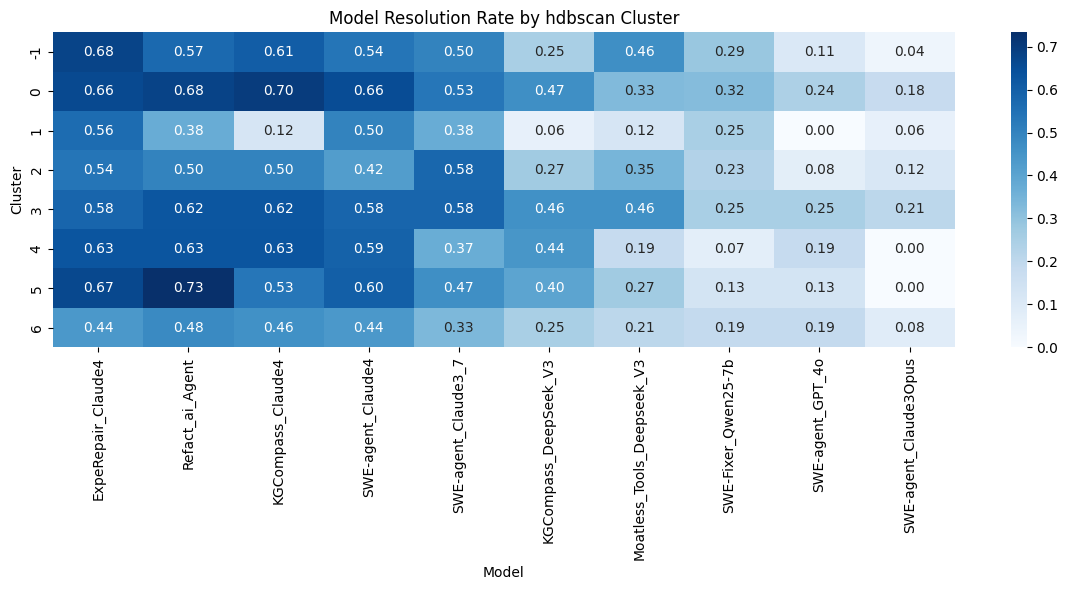

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(cluster_perf, annot=True, fmt=".2f", cmap="Blues")
plt.title("Model Resolution Rate by hdbscan Cluster")
plt.xlabel("Model")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig(os.path.join(save_path, "hdbscan_resolution_heatmap.pdf"))
plt.show()


In [14]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import statsmodels.formula.api as smf


# Helper: Cramér's V
def cramers_v(ct):
    chi2 = chi2_contingency(ct)[0]
    n = ct.sum().sum()
    k = min(ct.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

CLUSTER_COL = "hdbscan_topic"

AGENT_COLS = [
    "ExpeRepair_Claude4",
    "Refact_ai_Agent",
    "KGCompass_Claude4",
    "SWE-agent_Claude4",
    "SWE-agent_Claude3_7",
    "KGCompass_DeepSeek_V3",
    "Moatless_Tools_Deepseek_V3",
    "SWE-Fixer_Qwen25-7b",
    "SWE-agent_GPT_4o",
    "SWE-agent_Claude3Opus"
]

print("=" * 80)
print(f"Analyzing relationship between cluster '{CLUSTER_COL}' and agent performance")
print("Success is binary (0 = fail, 1 = success)")
print("=" * 80)

# Per-agent chi-square analysis
print("\n[1] Per-agent chi-square tests of independence")
print(
    "For each agent, we test whether success is independent of cluster assignment.\n"
    "A low p-value indicates that the agent's success rate varies across clusters."
)

results = []

for agent in AGENT_COLS:
    ct = pd.crosstab(df[CLUSTER_COL], df[agent])
    chi2, p, dof, _ = chi2_contingency(ct)
    cv = cramers_v(ct)

    results.append({
        "agent": agent,
        "chi2_p_value": p,
        "cramers_v": cv
    })

results_df = pd.DataFrame(results)

# Multiple testing correction

print("\n[2] Multiple testing correction (Benjamini–Hochberg FDR)")
print(
    "Because we test multiple agents, we control the false discovery rate.\n"
    "Use the FDR-corrected p-values to assess statistical significance."
)

results_df["chi2_p_fdr"] = multipletests(
    results_df["chi2_p_value"],
    method="fdr_bh"
)[1]

results_df = results_df.sort_values("chi2_p_fdr")

print("\nInterpretation guide:")
print(" - chi2_p_fdr < 0.05 : statistically significant association")
print(" - Cramér’s V ≈ 0.1  : small effect")
print(" - Cramér’s V ≈ 0.3  : moderate effect")
print(" - Cramér’s V ≥ 0.5  : strong effect")

print("\nChi-square results:")
print(results_df)


Analyzing relationship between cluster 'hdbscan_topic' and agent performance
Success is binary (0 = fail, 1 = success)

[1] Per-agent chi-square tests of independence
For each agent, we test whether success is independent of cluster assignment.
A low p-value indicates that the agent's success rate varies across clusters.

[2] Multiple testing correction (Benjamini–Hochberg FDR)
Because we test multiple agents, we control the false discovery rate.
Use the FDR-corrected p-values to assess statistical significance.

Interpretation guide:
 - chi2_p_fdr < 0.05 : statistically significant association
 - Cramér’s V ≈ 0.1  : small effect
 - Cramér’s V ≈ 0.3  : moderate effect
 - Cramér’s V ≥ 0.5  : strong effect

Chi-square results:
                        agent  chi2_p_value  cramers_v  chi2_p_fdr
2           KGCompass_Claude4      0.000896   0.286308    0.008962
5       KGCompass_DeepSeek_V3      0.010226   0.247766    0.051129
9       SWE-agent_Claude3Opus      0.037017   0.223022    0.1233

In [16]:

# Logistic regression (global analysis)
print("\n" + "=" * 80)
print("[3] Global logistic regression with cluster × agent interaction")
print(
    "This model tests whether the effect of cluster membership on success\n"
    "differs across agents (i.e., agent-specific sensitivity to issue type)."
)
print("=" * 80)

# Convert to long format
df_long = df.melt(
    id_vars=[CLUSTER_COL],
    value_vars=AGENT_COLS,
    var_name="agent",
    value_name="success"
)

df_long[CLUSTER_COL] = df_long[CLUSTER_COL].astype(str)
df_long["agent"] = df_long["agent"].astype(str)

# formula = f"success ~ C({CLUSTER_COL}) * C(agent)"
formula = f"success ~ C({CLUSTER_COL}) + C(agent)"
logit_model = smf.logit(formula, data=df_long).fit()

print("\nLogistic regression summary:")
print(logit_model.summary())

print("\nInterpretation guide:")
print(
    " - Significant cluster coefficients indicate clusters that are globally\n"
    "   easier or harder across agents.\n"
    " - Significant interaction terms indicate that specific agents respond\n"
    "   differently to certain clusters.\n"
    " - If interactions are insignificant, cluster effects are largely uniform."
)

print("\nAnalysis complete.")



[3] Global logistic regression with cluster × agent interaction
This model tests whether the effect of cluster membership on success
differs across agents (i.e., agent-specific sensitivity to issue type).
Optimization terminated successfully.
         Current function value: 0.593600
         Iterations 6

Logistic regression summary:
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2983
Method:                           MLE   Df Model:                           16
Date:                Sun, 28 Dec 2025   Pseudo R-squ.:                  0.1207
Time:                        06:58:11   Log-Likelihood:                -1780.8
converged:                       True   LL-Null:                       -2025.3
Covariance Type:            nonrobust   LLR p-value:                 6.664e-94
                              

## hdbscan with additional features

In [18]:
import pandas as pd

# Example with predicted GitHub labels
cluster_col = 'hdbscan_topic_all'
agent_cols = [
    'ExpeRepair_Claude4', 'Refact_ai_Agent', 'KGCompass_Claude4', 'SWE-agent_Claude4',
    'SWE-agent_Claude3_7', 'KGCompass_DeepSeek_V3', 'Moatless_Tools_Deepseek_V3',
    'SWE-Fixer_Qwen25-7b', 'SWE-agent_GPT_4o', 'SWE-agent_Claude3Opus'
]

cluster_perf = df.groupby(cluster_col)[agent_cols].mean()
cluster_perf


,ExpeRepair_Claude4,Refact_ai_Agent,KGCompass_Claude4,SWE-agent_Claude4,SWE-agent_Claude3_7,KGCompass_DeepSeek_V3,Moatless_Tools_Deepseek_V3,SWE-Fixer_Qwen25-7b,SWE-agent_GPT_4o,SWE-agent_Claude3Opus
hdbscan_topic_all,,,,,,,,,,
-1,0.700000,0.300000,0.400000,0.600000,0.500000,0.300000,0.200000,0.400000,0.000000,0.000000
0,0.716667,0.650000,0.616667,0.666667,0.633333,0.416667,0.516667,0.333333,0.333333,0.233333
1,0.625000,0.687500,0.625000,0.562500,0.375000,0.437500,0.187500,0.250000,0.062500,0.062500
2,0.576159,0.622517,0.596026,0.576159,0.470199,0.397351,0.271523,0.238411,0.178808,0.105960
3,0.354839,0.387097,0.354839,0.354839,0.322581,0.129032,0.193548,0.129032,0.096774,0.064516
4,0.718750,0.656250,0.718750,0.531250,0.437500,0.343750,0.281250,0.187500,0.125000,0.062500


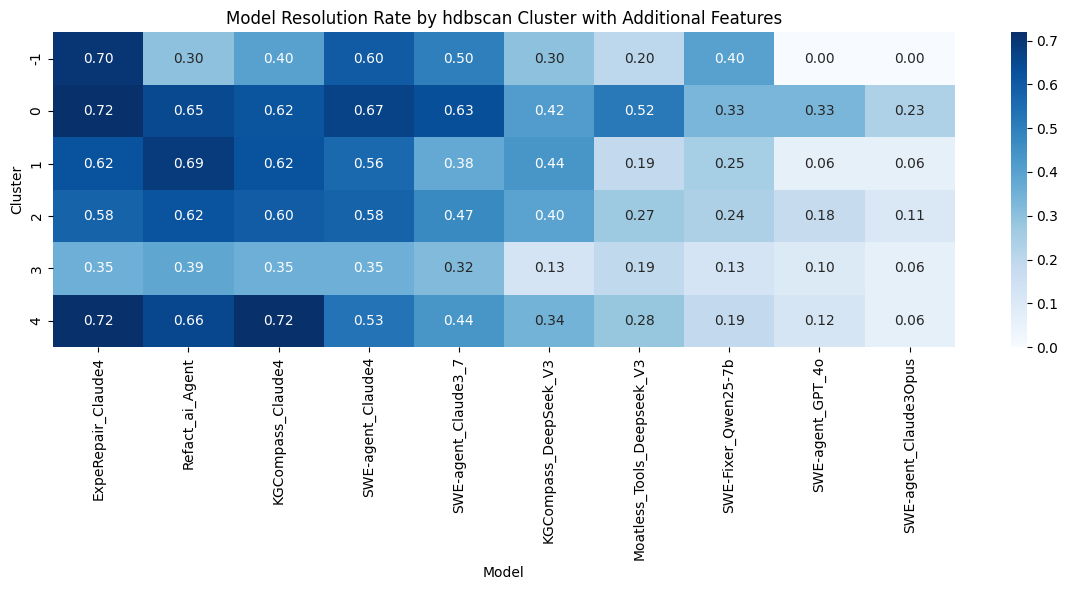

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(cluster_perf, annot=True, fmt=".2f", cmap="Blues")
plt.title("Model Resolution Rate by hdbscan Cluster with Additional Features")
plt.xlabel("Model")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig(os.path.join(save_path, "all_hdbscan_resolution_heatmap.pdf"))
plt.show()


In [20]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import statsmodels.formula.api as smf


# Helper: Cramér's V
def cramers_v(ct):
    chi2 = chi2_contingency(ct)[0]
    n = ct.sum().sum()
    k = min(ct.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

CLUSTER_COL = "hdbscan_topic_all"

AGENT_COLS = [
    "ExpeRepair_Claude4",
    "Refact_ai_Agent",
    "KGCompass_Claude4",
    "SWE-agent_Claude4",
    "SWE-agent_Claude3_7",
    "KGCompass_DeepSeek_V3",
    "Moatless_Tools_Deepseek_V3",
    "SWE-Fixer_Qwen25-7b",
    "SWE-agent_GPT_4o",
    "SWE-agent_Claude3Opus"
]

print("=" * 80)
print(f"Analyzing relationship between cluster '{CLUSTER_COL}' and agent performance")
print("Success is binary (0 = fail, 1 = success)")
print("=" * 80)

# Per-agent chi-square analysis
print("\n[1] Per-agent chi-square tests of independence")
print(
    "For each agent, we test whether success is independent of cluster assignment.\n"
    "A low p-value indicates that the agent's success rate varies across clusters."
)

results = []

for agent in AGENT_COLS:
    ct = pd.crosstab(df[CLUSTER_COL], df[agent])
    chi2, p, dof, _ = chi2_contingency(ct)
    cv = cramers_v(ct)

    results.append({
        "agent": agent,
        "chi2_p_value": p,
        "cramers_v": cv
    })

results_df = pd.DataFrame(results)

# Multiple testing correction

print("\n[2] Multiple testing correction (Benjamini–Hochberg FDR)")
print(
    "Because we test multiple agents, we control the false discovery rate.\n"
    "Use the FDR-corrected p-values to assess statistical significance."
)

results_df["chi2_p_fdr"] = multipletests(
    results_df["chi2_p_value"],
    method="fdr_bh"
)[1]

results_df = results_df.sort_values("chi2_p_fdr")

print("\nInterpretation guide:")
print(" - chi2_p_fdr < 0.05 : statistically significant association")
print(" - Cramér’s V ≈ 0.1  : small effect")
print(" - Cramér’s V ≈ 0.3  : moderate effect")
print(" - Cramér’s V ≥ 0.5  : strong effect")

print("\nChi-square results:")
print(results_df)


Analyzing relationship between cluster 'hdbscan_topic_all' and agent performance
Success is binary (0 = fail, 1 = success)

[1] Per-agent chi-square tests of independence
For each agent, we test whether success is independent of cluster assignment.
A low p-value indicates that the agent's success rate varies across clusters.

[2] Multiple testing correction (Benjamini–Hochberg FDR)
Because we test multiple agents, we control the false discovery rate.
Use the FDR-corrected p-values to assess statistical significance.

Interpretation guide:
 - chi2_p_fdr < 0.05 : statistically significant association
 - Cramér’s V ≈ 0.1  : small effect
 - Cramér’s V ≈ 0.3  : moderate effect
 - Cramér’s V ≥ 0.5  : strong effect

Chi-square results:
                        agent  chi2_p_value  cramers_v  chi2_p_fdr
6  Moatless_Tools_Deepseek_V3      0.004717   0.237264    0.047166
8            SWE-agent_GPT_4o      0.009857   0.224508    0.049285
0          ExpeRepair_Claude4      0.016339   0.215157    0.

In [23]:

# Logistic regression (global analysis)
print("\n" + "=" * 80)
print("[3] Global logistic regression with cluster × agent interaction")
print(
    "This model tests whether the effect of cluster membership on success\n"
    "differs across agents (i.e., agent-specific sensitivity to issue type)."
)
print("=" * 80)

# Convert to long format
df_long = df.melt(
    id_vars=[CLUSTER_COL],
    value_vars=AGENT_COLS,
    var_name="agent",
    value_name="success"
)

df_long[CLUSTER_COL] = df_long[CLUSTER_COL].astype(str)
df_long["agent"] = df_long["agent"].astype(str)

# formula = f"success ~ C({CLUSTER_COL}) * C(agent)"
formula = f"success ~ C({CLUSTER_COL}) + C(agent)"
logit_model = smf.logit(formula, data=df_long).fit()

print("\nLogistic regression summary:")
print(logit_model.summary())

print("\nInterpretation guide:")
print(
    " - Significant cluster coefficients indicate clusters that are globally\n"
    "   easier or harder across agents.\n"
    " - Significant interaction terms indicate that specific agents respond\n"
    "   differently to certain clusters.\n"
    " - If interactions are insignificant, cluster effects are largely uniform."
)

print("\nAnalysis complete.")



[3] Global logistic regression with cluster × agent interaction
This model tests whether the effect of cluster membership on success
differs across agents (i.e., agent-specific sensitivity to issue type).
Optimization terminated successfully.
         Current function value: 0.593983
         Iterations 6

Logistic regression summary:
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2985
Method:                           MLE   Df Model:                           14
Date:                Sun, 28 Dec 2025   Pseudo R-squ.:                  0.1202
Time:                        07:07:14   Log-Likelihood:                -1781.9
converged:                       True   LL-Null:                       -2025.3
Covariance Type:            nonrobust   LLR p-value:                 5.826e-95
                              